In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,26/08/2020,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
1,25/08/2020,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
2,24/08/2020,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
3,23/08/2020,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,22/08/2020,22,8,2020,38,0,Afghanistan,AF,AFG,38041757.0,Asia,2.310619
...,...,...,...,...,...,...,...,...,...,...,...,...
38697,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38698,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38699,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38700,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,26/08/2020,1,0,Afghanistan,Asia,2.108210
1,25/08/2020,71,10,Afghanistan,Asia,2.670749
2,24/08/2020,0,0,Afghanistan,Asia,2.484112
3,23/08/2020,105,2,Afghanistan,Asia,2.484112
4,22/08/2020,38,0,Afghanistan,Asia,2.310619
...,...,...,...,...,...,...
38697,25/03/2020,0,0,Zimbabwe,Africa,NaN
38698,24/03/2020,0,1,Zimbabwe,Africa,NaN
38699,23/03/2020,0,0,Zimbabwe,Africa,NaN
38700,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,26/08/2020,1,0,Afghanistan,Asia,2.108210
1,25/08/2020,71,10,Afghanistan,Asia,2.670749
2,24/08/2020,0,0,Afghanistan,Asia,2.484112
3,23/08/2020,105,2,Afghanistan,Asia,2.484112
4,22/08/2020,38,0,Afghanistan,Asia,2.310619
...,...,...,...,...,...,...
38697,25/03/2020,0,0,Zimbabwe,Africa,NaN
38698,24/03/2020,0,1,Zimbabwe,Africa,NaN
38699,23/03/2020,0,0,Zimbabwe,Africa,NaN
38700,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38701,21/03/2020,1,0,Zimbabwe,Africa,NaN
38700,22/03/2020,1,0,Zimbabwe,Africa,NaN
38699,23/03/2020,0,0,Zimbabwe,Africa,NaN
38698,24/03/2020,0,1,Zimbabwe,Africa,NaN
38697,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,22/08/2020,38,0,Afghanistan,Asia,2.310619
3,23/08/2020,105,2,Afghanistan,Asia,2.484112
2,24/08/2020,0,0,Afghanistan,Asia,2.484112
1,25/08/2020,71,10,Afghanistan,Asia,2.670749


In [10]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38701,21/03/2020,1,0,Zimbabwe,Africa,NaN
38700,22/03/2020,1,0,Zimbabwe,Africa,NaN
38699,23/03/2020,0,0,Zimbabwe,Africa,NaN
38698,24/03/2020,0,1,Zimbabwe,Africa,NaN
38697,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [11]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,,,
Afghanistan,38071,1397,1388.455849
Albania,8759,259,3779.729579
Algeria,42228,1456,1287.065489
Andorra,1060,53,17476.403639
Angola,2222,100,86.613483
...,...,...,...
Vietnam,1029,27,14.186918
Western_Sahara,766,1,1827.771273
Yemen,1924,557,90.487863


In [12]:
k=country_wise.nlargest(10, ['cases'])
k.drop("deaths",axis=1,inplace=True)
k.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
k

,cases
country,
United_States_of_America,5779028
Brazil,3669995
India,3234474
Russia,966189
South_Africa,613017
Peru,607382
Mexico,568621
Colombia,562128
Spain,412553


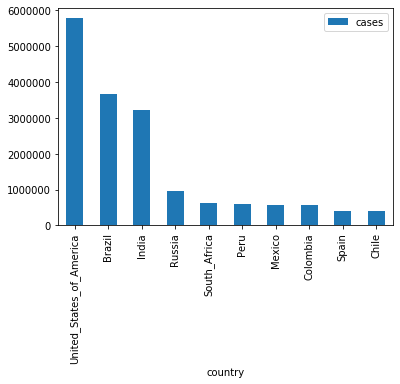

In [13]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [14]:
l=country_wise.nlargest(10, ['deaths'])
l.drop("cases",axis=1,inplace=True)
l.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
l

,deaths
country,
United_States_of_America,178486
Brazil,116580
Mexico,61450
India,59449
United_Kingdom,41449
Italy,35445
France,30544
Spain,28924
Peru,28001


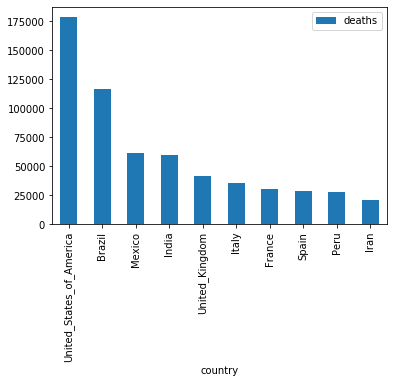

In [15]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")

In [16]:
m=country_wise.nlargest(10, ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
m.drop("deaths",axis=1,inplace=True)
m.drop("cases",axis=1,inplace=True)
m

,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,
Qatar,57232.569381
Bahrain,40531.720169
San_Marino,28850.898325
Chile,28786.644811
Panama,27373.352738
Kuwait,25881.484936
Peru,23880.118960
Oman,23478.831725
United_States_of_America,23418.392548


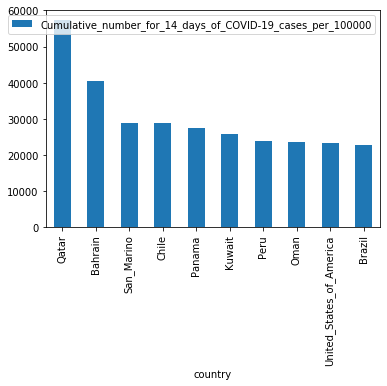

In [17]:
m.plot.bar()
plt.savefig("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")